In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Reload the dataset from the file with the 'soil_type' column
file_name = 'Crop_recommendation_with_soil.csv'
df = pd.read_csv(file_name)

# 2. Print all columns to ensure 'soil_type' is present and correctly named
print("--- Data Reloaded Successfully ---")
print("All columns in the DataFrame:")
print(df.columns.tolist())
print("-" * 35)

# 3. Check data types
print("Data types:")
print(df.dtypes)

--- Data Reloaded Successfully ---
All columns in the DataFrame:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'soil_type']
-----------------------------------
Data types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
soil_type       object
dtype: object


In [2]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Alluvial
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Alluvial
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Alluvial
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Alluvial
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Alluvial
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,Laterite
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,Laterite
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,Laterite
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,Laterite


In [3]:
# Perform one-hot encoding on the new categorical feature 'soil_type'
df = pd.get_dummies(df, columns=['soil_type'], drop_first=True)

# Check the columns after encoding to confirm the new columns
print("\n--- One-Hot Encoding Successful ---")
print("Columns after get_dummies:")
print(df.columns.tolist())
print("-" * 37)
print("First few rows of processed data:")
print(df.head())


--- One-Hot Encoding Successful ---
Columns after get_dummies:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'soil_type_Black Soil (Regur)', 'soil_type_Laterite', 'soil_type_Loamy', 'soil_type_Loamy (Light Soil)', 'soil_type_Sandy Loam']
-------------------------------------
First few rows of processed data:
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_type_Black Soil (Regur)  soil_type_Laterite  soil_type_Loamy  \
0                         False               False            False   
1                         False               False            False   
2                         False   

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_type_Black Soil (Regur),soil_type_Laterite,soil_type_Loamy,soil_type_Loamy (Light Soil),soil_type_Sandy Loam
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,False,False,False,False,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,False,False,False,False,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,False,False,False,False,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,False,False,False,False,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,False,False,False,False,False


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_type_Black Soil (Regur),soil_type_Laterite,soil_type_Loamy,soil_type_Loamy (Light Soil),soil_type_Sandy Loam
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,False,True,False,False,False
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,False,True,False,False,False
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,False,True,False,False,False
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,False,True,False,False,False
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,False,True,False,False,False


In [6]:
# Data cleaning
df.dropna(inplace=True)
df.isnull().sum()

N                               0
P                               0
K                               0
temperature                     0
humidity                        0
ph                              0
rainfall                        0
label                           0
soil_type_Black Soil (Regur)    0
soil_type_Laterite              0
soil_type_Loamy                 0
soil_type_Loamy (Light Soil)    0
soil_type_Sandy Loam            0
dtype: int64

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df.shape

(2200, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   N                             2200 non-null   int64  
 1   P                             2200 non-null   int64  
 2   K                             2200 non-null   int64  
 3   temperature                   2200 non-null   float64
 4   humidity                      2200 non-null   float64
 5   ph                            2200 non-null   float64
 6   rainfall                      2200 non-null   float64
 7   label                         2200 non-null   object 
 8   soil_type_Black Soil (Regur)  2200 non-null   bool   
 9   soil_type_Laterite            2200 non-null   bool   
 10  soil_type_Loamy               2200 non-null   bool   
 11  soil_type_Loamy (Light Soil)  2200 non-null   bool   
 12  soil_type_Sandy Loam          2200 non-null   bool   
dtypes: 

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.corr

<bound method DataFrame.corr of         N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      soil_type_Black Soil (Regur)  soil_type_Laterite  soil_type_L

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

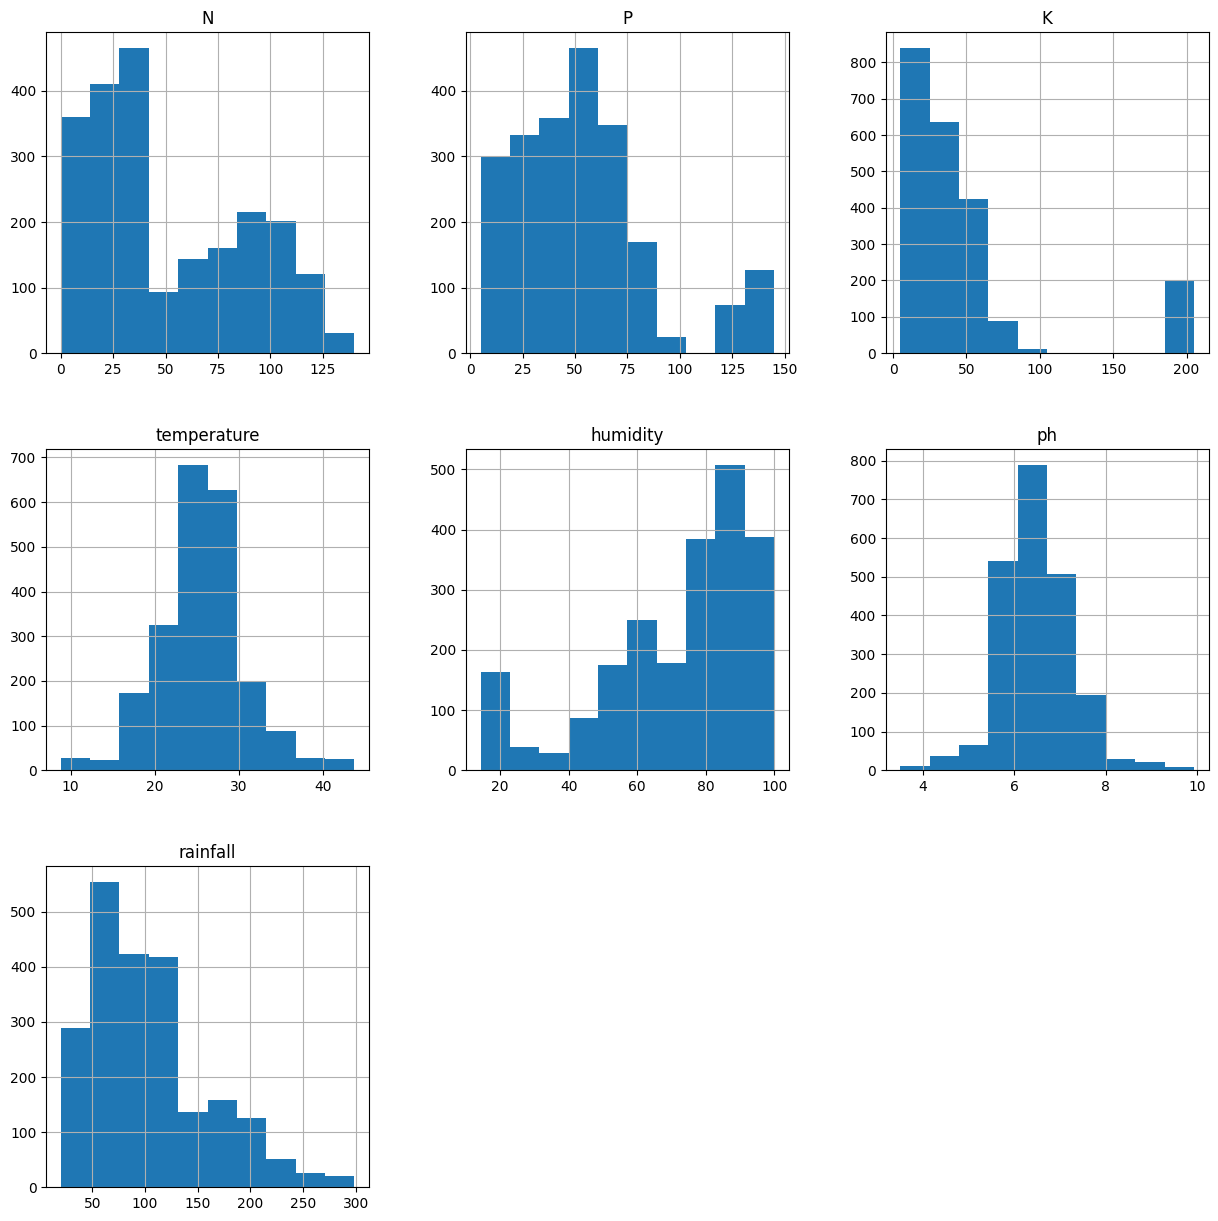

In [12]:
# Plot histogram of all the features in the dataset
df.hist(figsize=(15,15))

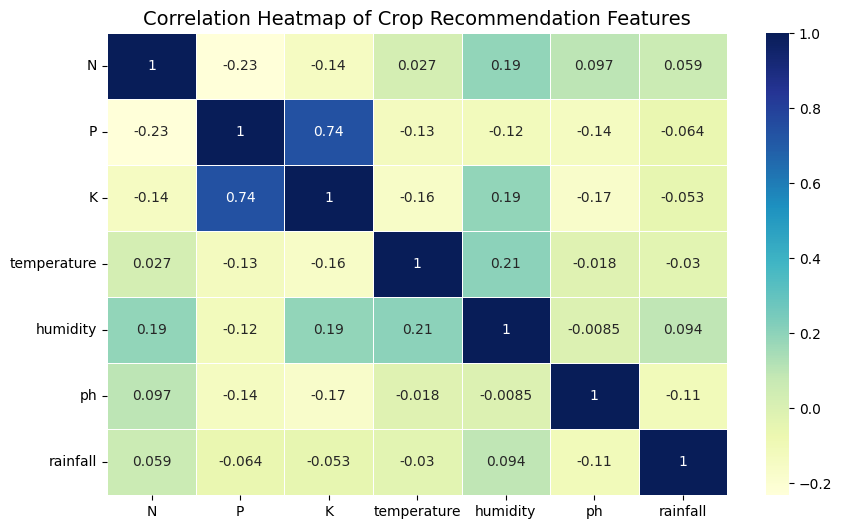

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Set figure size
plt.figure(figsize=(10,6))

# Create heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5)

plt.title("Correlation Heatmap of Crop Recommendation Features", fontsize=14)
plt.show()


In [14]:
# Unique label in the dataset
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [16]:
df['label'].unique().size

22

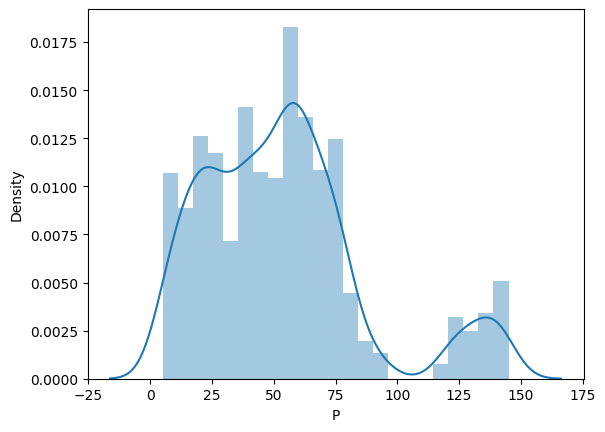

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['P'])
plt.show()

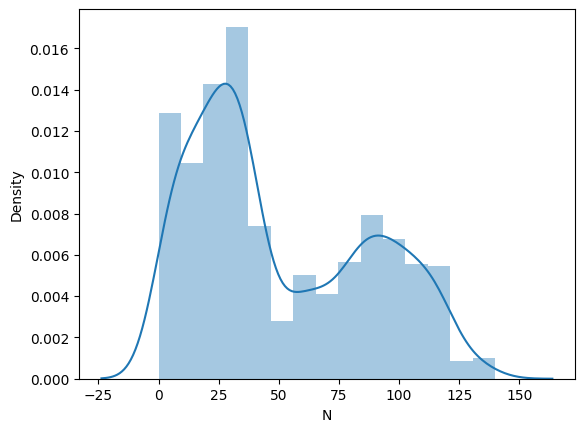

In [18]:
import matplotlib.pyplot as plt
sns.distplot(df['N'])
plt.show()

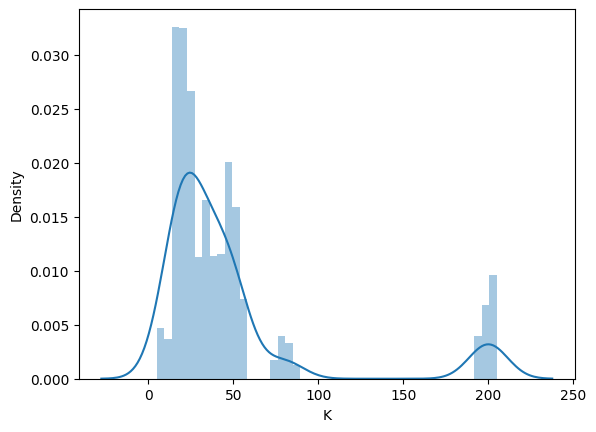

In [19]:
import matplotlib.pyplot as plt
sns.distplot(df['K'])
plt.show()

In [20]:
# The 'label' column is the target (y), so we drop it from the features (X)
X = df.drop('label', axis=1)  # Features
y = df['label']              # Labels

# You can check the new features:
print("New Features (X) after dropping 'label':")
print(X.columns.tolist())

New Features (X) after dropping 'label':
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil_type_Black Soil (Regur)', 'soil_type_Laterite', 'soil_type_Loamy', 'soil_type_Loamy (Light Soil)', 'soil_type_Sandy Loam']


In [21]:
#A. Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib 

# --- A. DATA LOADING AND PREPROCESSING ---

# 1. Load the data
file_name = 'Crop_recommendation_with_soil.csv'
df = pd.read_csv(file_name)

# 2. One-Hot Encoding for 'soil_type'
df = pd.get_dummies(df, columns=['soil_type'], drop_first=True)

# 3. Define Features (X) and Target (y)
X = df.drop('label', axis=1) # Features include N, P, K, temp, hum, ph, rain, and soil type dummies
y = df['label']              # Target

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize and Fit the Scaler (Crucial for consistent scaling in deployment)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- B. MODEL TRAINING AND EVALUATION ---

# 6. Initialize and Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training Random Forest Classifier...")
model.fit(X_train_scaled, y_train)
print("Training complete.")

# 7. Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("-" * 40)
print(f"Model Accuracy on Test Set: {accuracy*100:.2f}%")
print("-" * 40)

# --- C. SAVING DEPLOYMENT ARTIFACTS ---

# 8. Save the trained model, the fitted scaler, and the feature list
joblib.dump(model, 'crop_prediction_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model, scaler, and feature list saved successfully for deployment.")

Training Random Forest Classifier...
Training complete.
----------------------------------------
Model Accuracy on Test Set: 99.32%
----------------------------------------
Model, scaler, and feature list saved successfully for deployment.


In [26]:
#B. MODEL TRAINING (DecisionTreeClassifier) ---

# 5. Initialize and Train the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
print("Training Decision Tree Classifier...")
model.fit(X_train_scaled, y_train)
print("Training complete.")

# 6. Evaluate the model
y_pred = model.predict(X_test_scaled)
dt_acc_score = accuracy_score(y_test, y_pred)
print("-" * 50)
print(f"Decision Tree Accuracy on Test Set: {dt_acc_score*100:.2f}%")
print("-" * 50)

# --- C. SAVING DEPLOYMENT ARTIFACTS ---

# 7. Save the trained model, the fitted scaler, and the feature list
joblib.dump(model, 'crop_prediction_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model, scaler, and feature list saved successfully for deployment.")

Training Decision Tree Classifier...
Training complete.
--------------------------------------------------
Decision Tree Accuracy on Test Set: 94.55%
--------------------------------------------------
Model, scaler, and feature list saved successfully for deployment.


In [29]:
#C. MODEL TRAINING (Logistic Regression) ---

# 5. Initialize and Train the Logistic Regression Classifier
# max_iter is increased to ensure convergence for the multi-class problem
model = LogisticRegression(random_state=2, solver='liblinear', max_iter=200)
print("Training Logistic Regression Classifier...")
model.fit(X_train_scaled, y_train)
print("Training complete.")

# 6. Evaluate the model
y_pred = model.predict(X_test_scaled)
lr_acc_score = accuracy_score(y_test, y_pred)
print("-" * 50)
print(f"Logistic Regression Accuracy on Test Set: {lr_acc_score*100:.2f}%")
print("-" * 50)

# --- C. SAVING DEPLOYMENT ARTIFACTS ---

# 7. Save the trained model, the fitted scaler, and the feature list
joblib.dump(model, 'crop_prediction_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')

print("Model, scaler, and feature list saved successfully for deployment")

Training Logistic Regression Classifier...
Training complete.
--------------------------------------------------
Logistic Regression Accuracy on Test Set: 96.82%
--------------------------------------------------
Model, scaler, and feature list saved successfully for deployment


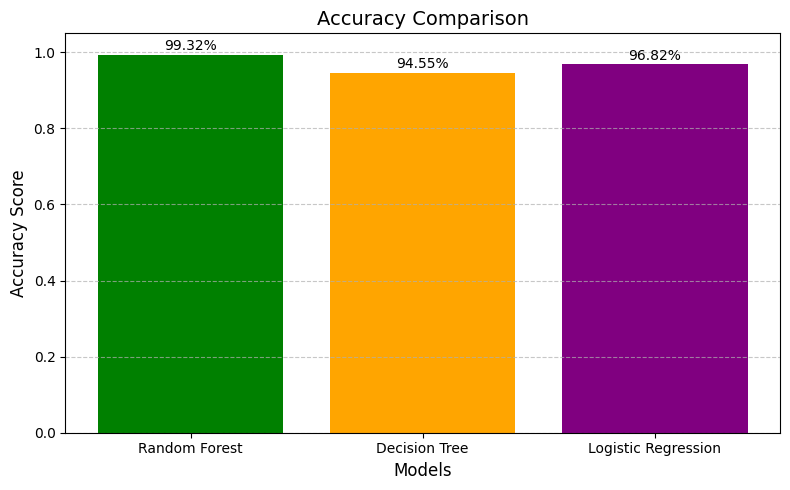

In [32]:
import matplotlib.pyplot as plt

# Explicitly defining the scores based on the calculated values
# (Random Forest: 0.9932, Decision Tree: 0.9455, Logistic Regression: 0.9682)
RF_acc_score = 0.9932
DT_acc_score = 0.9455
LR_acc_score = 0.9682

# Define the data lists
acc_score_list = [RF_acc_score, DT_acc_score, LR_acc_score]
models_list = ['Random Forest', 'Decision Tree', 'Logistic Regression']
color=['green', 'orange', 'purple']

plt.figure(figsize=(8, 5))
bars = plt.bar(models_list, acc_score_list, color=color)

# Add accuracy values on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Accuracy Comparison', fontsize=14)
plt.ylim(0, 1.05) # Set y-limit slightly above 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import joblib
import numpy as np

# --- 1. Load the required deployment artifacts ---
try:
    model = joblib.load('crop_prediction_model.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    model_features = joblib.load('model_features.pkl')
    print("Model, scaler, and feature list loaded successfully.")
except FileNotFoundError:
    print("ERROR: Required model files not found. Please run the training cell above first!")
    
# --- 2. Deployment Prediction Function ---

def predict_crop(N, P, K, temperature, humidity, ph, rainfall, soil_type):
    """
    Predicts the recommended crop based on given conditions, ensuring input preprocessing
    matches the training pipeline.
    """
    
    # 1. Create a DataFrame from the input data
    input_data = pd.DataFrame([{
        'N': N, 'P': P, 'K': K, 'temperature': temperature,
        'humidity': humidity, 'ph': ph, 'rainfall': rainfall,
        'soil_type': soil_type
    }])
    
    # 2. Apply One-Hot Encoding to 'soil_type'
    input_encoded = pd.get_dummies(input_data, columns=['soil_type'], drop_first=True)
    
    # 3. Align the encoded features to match the training data feature columns (Crucial step!)
    final_features = pd.DataFrame(0, index=[0], columns=model_features)
    
    # Copy over the numerical features and the newly created dummy features
    for col in final_features.columns:
        if col in input_encoded.columns:
            final_features[col] = input_encoded[col]
            
    # 4. Apply Scaling using the saved scaler
    input_scaled = scaler.transform(final_features)
    
    # 5. Make Prediction
    prediction_array = model.predict(input_scaled)
    
    return prediction_array[0]


# --- 3. Interactive Usage ---

print("\n" + "="*50)
print("INTERACTIVE CROP PREDICTION")
print("="*50)

# Get numerical inputs
try:
    N = float(input("Enter Nitrogen (N) content (e.g., 90): "))
    P = float(input("Enter Phosphorus (P) content (e.g., 42): "))
    K = float(input("Enter Potassium (K) content (e.g., 43): "))
    temperature = float(input("Enter Temperature in Celsius (e.g., 20.8): "))
    humidity = float(input("Enter Humidity in % (e.g., 82.0): "))
    ph = float(input("Enter pH value (e.g., 6.5): "))
    rainfall = float(input("Enter Rainfall in mm (e.g., 202.9): "))
    
    # Get categorical input
    soil_type = input("Enter Soil Type (e.g., Alluvial, Clayey, Sandy): ")

    # Call the prediction function with user input
    final_predicted_crop = predict_crop(N, P, K, temperature, humidity, ph, rainfall, soil_type)
    
    print("\n" + "*"*50)
    print(f"RECOMMENDATION: The best crop is: {final_predicted_crop.upper()}")
    print("*"*50)

except ValueError:
    print("\nERROR: Please ensure all numerical inputs are entered as valid numbers.")
except Exception as e:
    print(f"\nAn unexpected error occurred during prediction: {e}")

Model, scaler, and feature list loaded successfully.

INTERACTIVE CROP PREDICTION


Enter Nitrogen (N) content (e.g., 90):  78
Enter Phosphorus (P) content (e.g., 42):  45
Enter Potassium (K) content (e.g., 43):  56
Enter Temperature in Celsius (e.g., 20.8):  45.9
Enter Humidity in % (e.g., 82.0):  89
Enter pH value (e.g., 6.5):  6.8
Enter Rainfall in mm (e.g., 202.9):  150
Enter Soil Type (e.g., Alluvial, Clayey, Sandy):  Clayey



**************************************************
RECOMMENDATION: The best crop is: JUTE
**************************************************


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# --- 1. SETUP AND INPUT ---
# You will be prompted to enter a crop name when you run this cell.
specified_label = input("Enter the crop that you want to plant (e.g., rice, wheat): ")

# Load the dataset
# Assumes 'df' is loaded, or loads it again here for safety
try:
    df = pd.read_csv('Crop_recommendation.csv')
except FileNotFoundError:
    print("Error: 'Crop_recommendation.csv' not found. Please ensure it is in your directory.")
    # Stop execution if data is missing

# Filter the dataset for the specified label
df_specified_label = df[df['label'] == specified_label].copy()

if df_specified_label.empty:
    print(f"Error: No data found for crop '{specified_label}'. Please check the spelling.")
else:
    # --- 2. DATA PREPARATION ---
    # Separate features (X) and targets (Y)
    X = df_specified_label[['temperature', 'humidity','ph', 'rainfall']]
    Y_N = df_specified_label['N']
    Y_P = df_specified_label['P']
    Y_K = df_specified_label['K']

    # Split the dataset into training and testing sets (FIXED SYNTAX ERROR)
    X_train, X_test, Y_N_train, Y_N_test, Y_P_train, Y_P_test, Y_K_train, Y_K_test = train_test_split(
        X, Y_N, Y_P, Y_K, test_size=0.2, random_state=42
    )

    # --- 3. TRAINING ---
    rf_N = RandomForestRegressor(random_state=42)
    rf_P = RandomForestRegressor(random_state=42)
    rf_K = RandomForestRegressor(random_state=42)

    rf_N.fit(X_train, Y_N_train)
    rf_P.fit(X_train, Y_P_train)
    rf_K.fit(X_train, Y_K_train)

    # --- 4. PREDICTION AND EVALUATION ---

    # Example conditions for prediction
    # New features: [temperature, humidity, ph, rainfall]
    new_features = np.array([[20, 70, 6, 200]])

    predicted_N = rf_N.predict(new_features)[0]
    predicted_P = rf_P.predict(new_features)[0]
    predicted_K = rf_K.predict(new_features)[0]
    
    # Calculate MSE on the test set
    mse_N = mean_squared_error(Y_N_test, rf_N.predict(X_test))
    mse_P = mean_squared_error(Y_P_test, rf_P.predict(X_test))
    mse_K = mean_squared_error(Y_K_test, rf_K.predict(X_test))


    print(f'\n--- Model Evaluation for {specified_label} ---')
    print(f'N Mean Squared Error (MSE): {mse_N:.2f}')
    print(f'P Mean Squared Error (MSE): {mse_P:.2f}')
    print(f'K Mean Squared Error (MSE): {mse_K:.2f}')
    
    print(f'\n--- Predicted Optimal NPK for New Conditions (T=20, H=70, pH=6, R=200) ---')
    print(f'Predicted N for {specified_label}: {predicted_N:.2f}')
    print(f'Predicted P for {specified_label}: {predicted_P:.2f}')
    print(f'Predicted K for {specified_label}: {predicted_K:.2f}')

Enter the crop that you want to plant (e.g., rice, wheat):  coconut



--- Model Evaluation for coconut ---
N Mean Squared Error (MSE): 116.74
P Mean Squared Error (MSE): 80.26
K Mean Squared Error (MSE): 12.03

--- Predicted Optimal NPK for New Conditions (T=20, H=70, pH=6, R=200) ---
Predicted N for coconut: 13.02
Predicted P for coconut: 21.15
Predicted K for coconut: 31.53
